In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv


Some questions before doing data analysis
1. Which Airbnb host has the most accommodation listing?
2. Which borough locates the most accommodations?
3. Which type of room is listed the most on Airbnb?
4. How diffrerent are the accommodation prices by boroughs?

# **1. Import packages and load data**

## 1.1. Import packages

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
import geopandas
import geoplot
from geopandas import GeoDataFrame

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## 1.2. Load data file

In [3]:
file = '../input/airbnbopendata/Airbnb_Open_Data.csv'
df_raw = pd.read_csv(file, low_memory=False)

# **2. Data Exploration**

In [4]:
# Duplicate the existing database
df = df_raw.copy()

## 2.1. Examine dataset

In [5]:
# Examine the dataset's head
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
# # Examine the dataset's shape
df.shape

(102599, 26)

This dataset originally has **102,599 rows** and **26 columns**

In [7]:
# Get the dataset's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [8]:
# Check the columns' names
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [9]:
# Describe columns' statistics
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [10]:
# Count the missing values in each column:
df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

<AxesSubplot:>

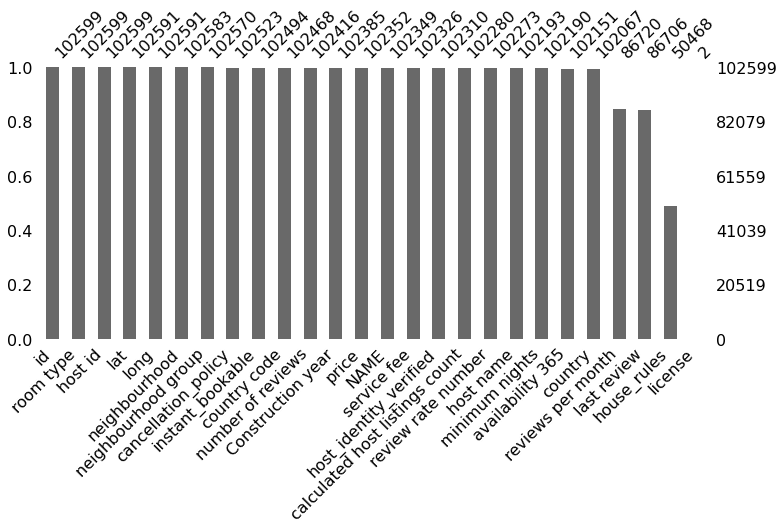

In [11]:
# Plotting barplot representing missing data in each column
fig,ax=plt.subplots(figsize=(12,12))
msno.bar(df,figsize=(12, 5), sort='descending')

In [12]:
def check_missing_value(column:'str'):
    print(f'Percentage of Missing data in \033[1m"{column}"\033[0m is \033[1m{round(df[column].isna().sum()/df[column].shape[0] * 100, 2)} %\033[0m')
for x in df.columns:
    check_missing_value(x)

Percentage of Missing data in "id" is 0.0 %
Percentage of Missing data in "NAME" is 0.24 %
Percentage of Missing data in "host id" is 0.0 %
Percentage of Missing data in "host_identity_verified" is 0.28 %
Percentage of Missing data in "host name" is 0.4 %
Percentage of Missing data in "neighbourhood group" is 0.03 %
Percentage of Missing data in "neighbourhood" is 0.02 %
Percentage of Missing data in "lat" is 0.01 %
Percentage of Missing data in "long" is 0.01 %
Percentage of Missing data in "country" is 0.52 %
Percentage of Missing data in "country code" is 0.13 %
Percentage of Missing data in "instant_bookable" is 0.1 %
Percentage of Missing data in "cancellation_policy" is 0.07 %
Percentage of Missing data in "room type" is 0.0 %
Percentage of Missing data in "Construction year" is 0.21 %
Percentage of Missing data in "price" is 0.24 %
Percentage of Missing data in "service fee" is 0.27 %
Percentage of Missing data in "minimum nights" is 0.4 %
Percentage of Missing data in "number o

The **license** column has **100%** of the NaN value, and the house_rules column lacks about **51%** of the data. Therefore, these two columns must be removed due to their insufficiency.

The **'reviews per month'** and **'last review'** both lack **slightly higher than 15%** of the data, but it is still in an acceptable range to keep this data. 

The other columns have small missing data percentages and all are **less than 1%**, so it's acceptable to ignore these data vacancies.

## 2.2. Examine unique values and their occurences in each column

In [13]:
def check_unique_value(column:'str'):
    print(f'The \033[1m"{column}"\033[0m has \033[1m{df[column].nunique()}\033[0m unique values out of {df[column].shape[0]} values')
for x in df.columns:
    check_unique_value(x)

The "id" has 102058 unique values out of 102599 values
The "NAME" has 61281 unique values out of 102599 values
The "host id" has 102057 unique values out of 102599 values
The "host_identity_verified" has 2 unique values out of 102599 values
The "host name" has 13190 unique values out of 102599 values
The "neighbourhood group" has 7 unique values out of 102599 values
The "neighbourhood" has 224 unique values out of 102599 values
The "lat" has 21991 unique values out of 102599 values
The "long" has 17774 unique values out of 102599 values
The "country" has 1 unique values out of 102599 values
The "country code" has 1 unique values out of 102599 values
The "instant_bookable" has 2 unique values out of 102599 values
The "cancellation_policy" has 3 unique values out of 102599 values
The "room type" has 4 unique values out of 102599 values
The "Construction year" has 20 unique values out of 102599 values
The "price" has 1151 unique values out of 102599 values
The "service fee" has 231 unique

Some columns have just one value (e.g., column **'country'**, **'country code'**), are unnecessary for exploratory data analysis (e.g., **'host name'**), are not categorical data or continuous data, or lack so much data (e.g., **'house_rules'**, **'license'**). Therefore, removing these columns will make the dataframe significantly tidy.

The **'id'** and **'NAME'** might have duplicated values, but it is normal for a host to have multiple properties in the same id numbers, or the same name posting on Airbnb. So it is not necessary to remove these duplicated values.

# **3. Data Cleaning**

## 3.1. Removing unnecessary columns

There are **five unnecessary columns** need to be removed from the dataframe, because they lack so much data, or contain just one value, such as 'country_code' column and 'country' column.

In [14]:
# Drop unnecessary columns
df.drop([ 'host name', 'license', 'country code', 'country', 'house_rules'], axis=1, inplace=True)

The names of some dataframe's columns are long and unstandardised, so we should shorten and standardise the names so that they could be more compact for further analysis.

In [15]:
# Create a dictionary for renaming multiple columns
dict = {'NAME':'name',
       'host id':'host_id',
       'neighbourhood group':'borough',
        'cancellation_policy':'cxln_policy',
       'room type':'room_type',
       'Construction year':'constrctn_yr',
       'service fee':'serv_fee',
       'minimum nights':'min_nights',
       'number of reviews':'num_rev',
       'last review':'last_rev',
       'reviews per month':'rev_per_mth',
       'review rate number':'rev_rate_num',
       'calculated host listings count':'calc_host_list_count',
       'availability 365':'avail_365',
       }

In [16]:
# Rename the columns' name with standardised name
df.rename(columns=dict,
          inplace=True)

In [17]:
df.shape

(102599, 21)

After removing uneccessary columns, the dataset now has **102,599 rows** and **21 columns**.
## 3.2. Convert columns' data types value into appropriate types

According to the data dictionary, some columns must be in integer data type (e.g.,**construction_year**), and the **'instant_bookable**' column should be in booleans. Therefore, we should convert the data of those columns to the right types. In addition, the **price** and **service** columns should also be changed from object type to numeric type, for further calculation.

In [18]:
# Define a function to remove $ sign and space
def remove_dollar_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$","").replace(",","").replace(" ",""))

In [19]:
# Apply the funtion to remove dollar sign in columns
df["price"] = df["price"].apply(lambda x: remove_dollar_sign(x))
df["serv_fee"] = df["serv_fee"].apply(lambda x: remove_dollar_sign(x))

In [20]:
# Correct and replace wrong names
df['borough'] = df['borough'].replace('brookln', 'Brooklyn')
df['borough'] = df['borough'].replace('manhatan', 'Manhattan')

In [21]:
# Convert 'construction year' column to integer
df['constrctn_yr'] = df['constrctn_yr'].dropna().astype('Int64')

In [22]:
# Convert 'instant bookable' column to boolean
df['instant_bookable'] = df['instant_bookable'].dropna().astype('bool')

## 3.3. Remove negative values
The 'minimum nights' column and the 'availability 365' column have negative values, which make no sense, since day are non-negative. There may be an error in the input; therefore, we need to remove negative values in these two columns.
But before removing the negative values, we need to know how many negative values each column has, and their characteristics.

In [23]:
df['min_nights'].describe()

count    102190.000000
mean          8.135845
std          30.553781
min       -1223.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        5645.000000
Name: min_nights, dtype: float64

The maximum value in the 'minimum nights' column is 5,645, which is equivalent to 15.5 years. The data dictionary states 'Minimum nights for a booking made on this day'. We have little information about these data, therefore, it is better to turn negative values into absolute values.

In [24]:
# Count the number of negative values in 'minimum nights' column
min_night_neg_val = df[df['min_nights'] < 0].count()

In [25]:
# Calculate the percentage
min_night_neg_val/df.shape[0] * 100

id                        0.012671
name                      0.012671
host_id                   0.012671
host_identity_verified    0.012671
borough                   0.012671
neighbourhood             0.012671
lat                       0.012671
long                      0.012671
instant_bookable          0.011696
cxln_policy               0.011696
room_type                 0.012671
constrctn_yr              0.012671
price                     0.012671
serv_fee                  0.012671
min_nights                0.012671
num_rev                   0.012671
last_rev                  0.010721
rev_per_mth               0.010721
rev_rate_num              0.012671
calc_host_list_count      0.012671
avail_365                 0.012671
dtype: float64

The negative values in the 'minimum nights' column account for nearly **0.013%** of the dataframe. Therefore, turning these data into absolute values won't affect the dataframe significantly and thus, are necessary.

In [26]:
df['avail_365'].describe()

count    102151.000000
mean        141.133254
std         135.435024
min         -10.000000
25%           3.000000
50%          96.000000
75%         269.000000
max        3677.000000
Name: avail_365, dtype: float64

The data dictionary defines this column as 'The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host'. Therefore, we should also turn these values into absolute ones.

In [27]:
# Count the number of negative values in 'available 365' column
avail_365_neg_val = df[df['avail_365'] < 0].count()
print(avail_365_neg_val)

id                        432
name                      430
host_id                   432
host_identity_verified    430
borough                   432
neighbourhood             432
lat                       432
long                      432
instant_bookable          431
cxln_policy               431
room_type                 432
constrctn_yr              428
price                     431
serv_fee                  430
min_nights                426
num_rev                   431
last_rev                  348
rev_per_mth               349
rev_rate_num              431
calc_host_list_count      429
avail_365                 432
dtype: int64


In [28]:
avail_365_neg_val/df.shape[0] * 100

id                        0.421057
name                      0.419107
host_id                   0.421057
host_identity_verified    0.419107
borough                   0.421057
neighbourhood             0.421057
lat                       0.421057
long                      0.421057
instant_bookable          0.420082
cxln_policy               0.420082
room_type                 0.421057
constrctn_yr              0.417158
price                     0.420082
serv_fee                  0.419107
min_nights                0.415209
num_rev                   0.420082
last_rev                  0.339185
rev_per_mth               0.340159
rev_rate_num              0.420082
calc_host_list_count      0.418133
avail_365                 0.421057
dtype: float64

The negative values in the 'available 365' column account for nearly **0.421057%** of the dataframe. Therefore, these rows won't affect the dataframe significantly, and converting negative values into positive ones is necessary.

In [29]:
df['min_nights'] = abs(df['min_nights'])
df['avail_365'] = abs(df['avail_365'])

After converting, we should check to see if the data is all converted.

In [30]:
df['avail_365'].describe()

count    102151.000000
mean        141.179284
std         135.387040
min           0.000000
25%           4.000000
50%          96.000000
75%         269.000000
max        3677.000000
Name: avail_365, dtype: float64

In [31]:
df['min_nights'].describe()

count    102190.000000
mean          8.174518
std          30.543457
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        5645.000000
Name: min_nights, dtype: float64

# **4. Data Visualisation**

## 4.1 Airbnb Hosts' profile
### 4.1.1. Top 10 most given names for accommodation

[Text(0.5, 1.0, 'Top 10 most given names for accommodation')]

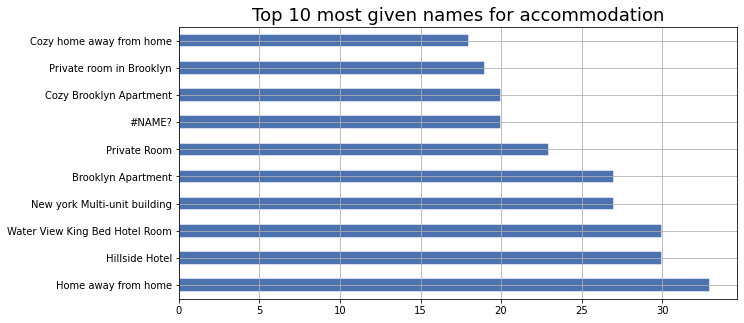

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(context='talk', font='Times New Roman')
host = df['name'].value_counts(ascending=False)
host.head(10).plot(kind='barh').set(title='Top 10 most given names for accommodation')

'Home away from home' is the most common name in Airbnb, with 33 occurrences. Followed up at the second are 'Hillside Hotel' and 'Water View King Bed Hotel Room' with 30 occurrences. The tenth position belongs to 'Cozy home away from home' with 18 occurrences.

### 4.1.2. Host verification status and Count of the instant Bookable of Airbnb Accommodation

(array([0, 1]), [Text(0, 0, 'unconfirmed'), Text(1, 0, 'verified')])

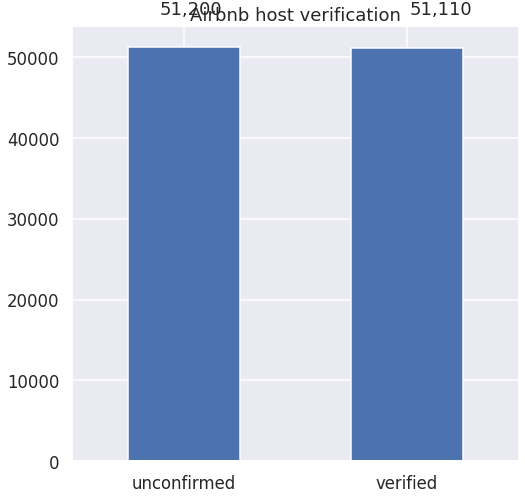

In [33]:
fig, ax = plt.subplots(figsize=(8,8))
host2 = df['host_identity_verified'].value_counts()
host2.plot(kind='bar').set(title='Airbnb host verification')
ax.annotate('51,200', xy=(160,485), xycoords='figure points')
ax.annotate('51,110', xy=(410,485), xycoords='figure points')
plt.xticks(rotation=0)

The number of  **'unconfirmed Airbnb hosts'** is **51,200 accounts**, taking up  **50.04%** of the total Airbnb host accounts. The number of **verified hosts** is **51,110 accounts**, slightly lower than the former. Half of the Airbnb hosts aren't verified their status, which is quite high.

## 4.2. Airbnb Accommodations' profile

### 4.2.1. Percentage and Count of acccomodation by borough

[Text(0.5, 1.0, 'Percentage of NYC Airbnb accommodation by borough'),
 Text(0.5, 0, 'Borough'),
 Text(0, 0.5, '')]

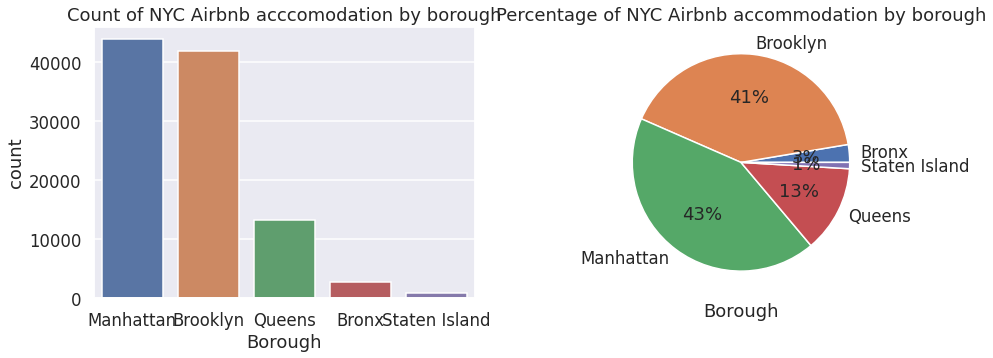

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), squeeze=False)
grp_order= df.groupby('borough')['id'].count().sort_values(ascending=False).index
sns.countplot(x=df['borough'], order=grp_order, ax=ax[0,0])\
                                                    .set(title='Count of NYC Airbnb acccomodation by borough', xlabel='Borough')
piedata = df.groupby('borough')['id'].count()
piedata.plot(kind='pie', autopct='%1.0f%%', ax=ax[0,1])\
                                                    .set(title='Percentage of NYC Airbnb accommodation by borough', xlabel='Borough' ,ylabel=None)

Looking at the count plot, we can see that **Manhattan** locates the most accommodation in New York, with **43,558 rooms**. Next in line is **Brooklyn** with **41,631 rooms**. On the other hand, **Staten Island** has the least accommodations, with **949 rooms** in total. **Manhattan** and **Brooklyn** account for **84%** of the total Airbnb accommodation in New York, while the other three boroughs account for only **16%** of the total supply.

### 4.2.2. Percentage and Count of Airbnb Accomodation by room type

In [35]:
df.groupby('room_type')['id'].count().sort_values(ascending=False)

room_type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: id, dtype: int64

[Text(0.5, 1.0, 'Percentage of NYC Airbnb accommodation by room type'),
 Text(0.5, 0, 'Room type'),
 Text(0, 0.5, '')]

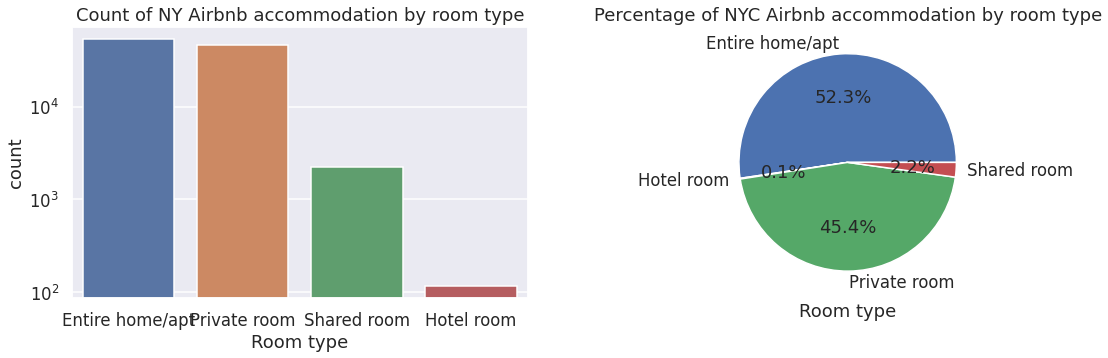

In [36]:
fig, ax = plt.subplots(1, 2,figsize=(18,5), squeeze=False)
room_order= df.groupby('room_type')['id'].count().sort_values(ascending=False).index
piedata2 = df.groupby('room_type')['id'].count()
sns.countplot(x='room_type', data=df, order=room_order, ax=ax[0,0])\
                                                                .set(title='Count of NY Airbnb accommodation by room type',xlabel='Room type')
ax[0,0].set_yscale('log')
piedata2.plot(kind='pie', autopct='%1.1f%%', ax=ax[0,1])\
                                                    .set(title='Percentage of NYC Airbnb accommodation by room type', xlabel='Room type' ,ylabel=None)

In [37]:
df.groupby('room_type')['id'].count()

room_type
Entire home/apt    53701
Hotel room           116
Private room       46556
Shared room         2226
Name: id, dtype: int64

The most common room types are **'Entire home/apt'** and **'Private room'**, which have a sum of **99,735** and take up **97.8%** of the total. **'Shared room'** and **'Hotel room'** account for only **2.3%**, with **'Hotel rooms'** having just **115 rooms** listed, or **0.1%** of the total room type.

### 4.2.3. Distribution of Airbnb Accommodation on Map

In [38]:
# Plot a geo plot
crs={'init':'epsg:4326'}
boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))
geo_df=geopandas.GeoDataFrame(df,crs=crs,geometry=geopandas.points_from_xy(df["long"], df["lat"]))

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [39]:
# Define a function for plotting a geomap
def geodf(x, y):
        geo_df[geo_df['borough']== x].plot(ax=ax, markersize=5, alpha=1,color=y, label=x)

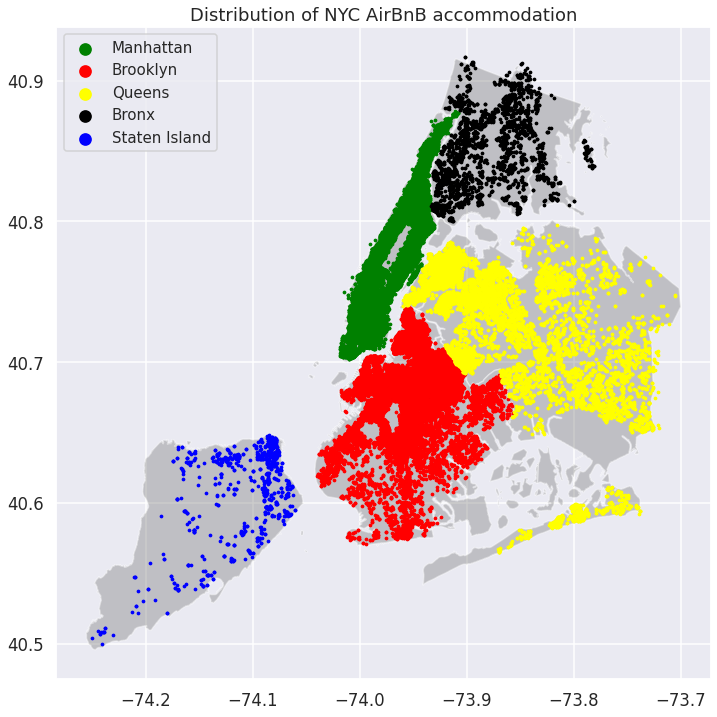

In [40]:
borough = {'Manhattan':'green', 'Brooklyn':'red', 'Queens':'yellow', 'Bronx':'black', 'Staten Island':'blue'}
fig,ax=plt.subplots(figsize=(12,12))
boroughs.plot(ax=ax,alpha=0.4,color="grey").set(title='Distribution of NYC AirBnB accommodation')
for x,y in borough.items():
    geodf(x, y)
plt.legend(fontsize=15, markerscale=5)

We can observe that while being the smallest borough in term of area,  Manhattan is densely populated with Airbnb accommodation.

In fact, **Manhattan** is one of the most densely populated locations in the world, with a 2020 census population of **1,694,251** living in a land area of **22.83 square miles (59.13 km2)**, or **72,918 residents per square mile (28,154/km2)**, higher than the density of any individual U.S. city, according to Wikipedia.
### 4.2.4. Airbnb accommodation by construction years

[Text(0.5, 1.0, 'Construction years of Airbnb accommodations'),
 Text(0.5, 0, 'Construction year')]

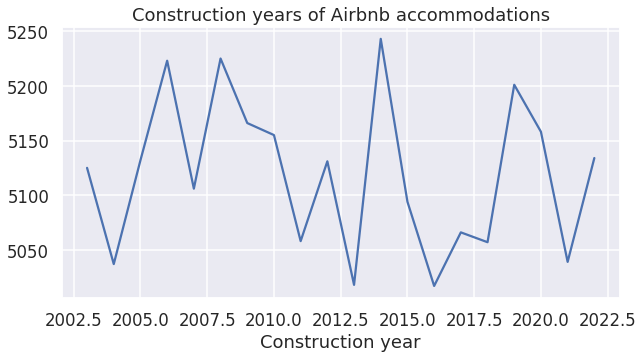

In [41]:
fig, ax= plt.subplots(figsize=(10, 5))
df.groupby('constrctn_yr')['id'].count().plot(kind='line')\
                                                        .set(title='Construction years of Airbnb accommodations', 
                                                             xlabel='Construction year')

There were **5,220 accommodations built in 2014**, making this year the most construction-built year. There was also a higher amount of accommodations built in 2006, 2008 and 2019. On the other hand, the two periods of 2010-2013 and 2015-2017 had the least constructions built, with their lowest year, 2013 and 2016, had only 4,995 and 4990 accommodations built, respectively.

### 4.2.5. Cancellation policy strictness

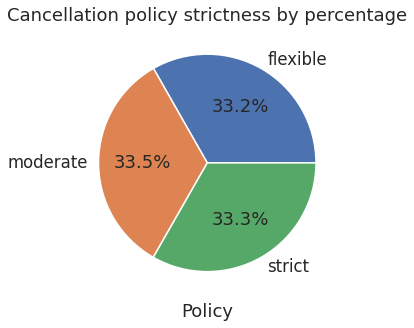

In [42]:
fig, ax= plt.subplots(figsize=(10, 5))
policy = df.groupby('cxln_policy')['id'].count().plot(kind='pie', autopct='%1.1f%%')\
                                                                                    .set(title='Cancellation policy strictness by percentage',
                                                                                         xlabel='Policy',
                                                                                          ylabel=None)

The accommodation's **cancellation policy** strictness is evenly distributed within three categories. Each category is slightly above 33%, with **'moderate policy'** being the highest at **33.5**%.

## 4.3. Minimum of nights and the availability in 365 days

In [43]:
df['min_nights'].mean()

8.17451805460417

The mean minimum night is 8.2 days. This indicates that, on average, an accommodation would host guests for 8.2 days.

### 4.3.1. Relation between Minimum of nights and number of Reviews

In [44]:
# Remove outliers in the 'min_nights' column
# Calculate IQR
Q1 = df['min_nights'].quantile(0.25)
Q3 = df['min_nights'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Remove outliers
df_no_ouliers = df[(df['min_nights'] > lower_bound) & (df['min_nights'] < upper_bound)]

[Text(0.5, 1.0, 'Relation between Minimum of nights and number of Reviews'),
 Text(0.5, 0, 'Minimum nights'),
 Text(0, 0.5, 'Number of reviews')]

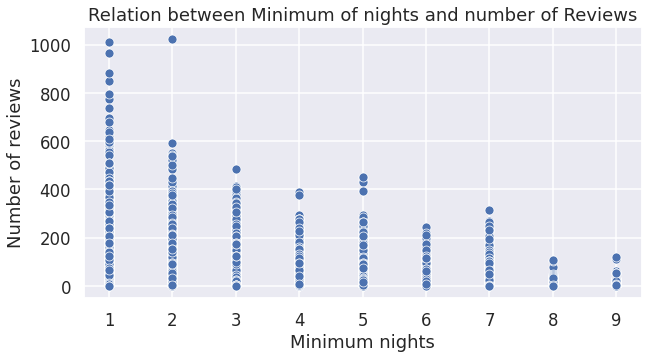

In [45]:
fig, ax= plt.subplots(figsize=(10, 5))
sns.scatterplot(data=df_no_ouliers, x='min_nights', y='num_rev')\
                                                    .set(title='Relation between Minimum of nights and number of Reviews', 
                                                         xlabel='Minimum nights', 
                                                         ylabel='Number of reviews')

From the scatterplot, we can observe that the high number of reviews might not indicate a higher number of nights customers stay in accommodations.

### 4.3.2. The availability in 365 days

<AxesSubplot:xlabel='avail_365', ylabel='Count'>

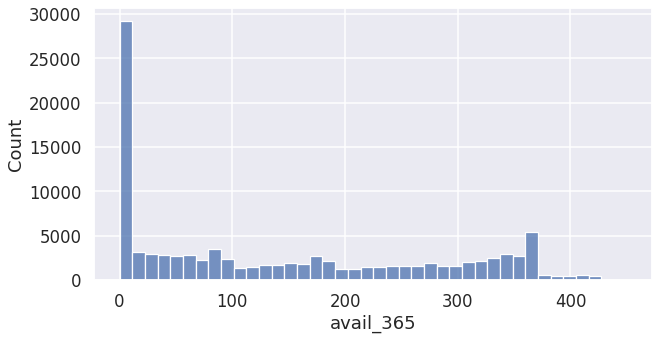

In [46]:
fig, ax= plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='avail_365',binrange=(0,450))

## 3. Price profile
### 3.1. Distributions of Accommodation price and Service fee

Text(750, 15, 'Each bin corresponds to $25')

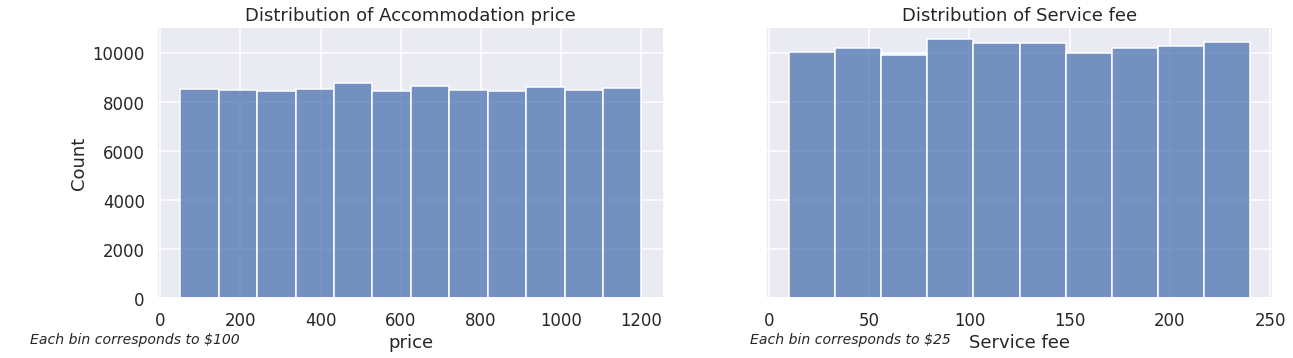

In [47]:
fig, ax= plt.subplots(1, 2, figsize=(20, 5), squeeze=False, sharey=True)
sns.histplot(x='price', data=df, bins=12, ax=ax[0,0]).set(title='Distribution of Accommodation price')
plt.annotate('Each bin corresponds to $100', xy=(30, 15), xycoords='figure points', fontstyle='italic', fontsize=14)
sns.histplot(x='serv_fee', data=df, bins=10, ax=ax[0,1]).set(title='Distribution of Service fee', xlabel='Service fee')
plt.annotate('Each bin corresponds to $25', xy=(750, 15), xycoords='figure points', fontstyle='italic', fontsize=14)

The price of Airbnb are distributed evenly across the price bins, similar is the case of the service fee.

### 3.2. Distribution of Price by Borough

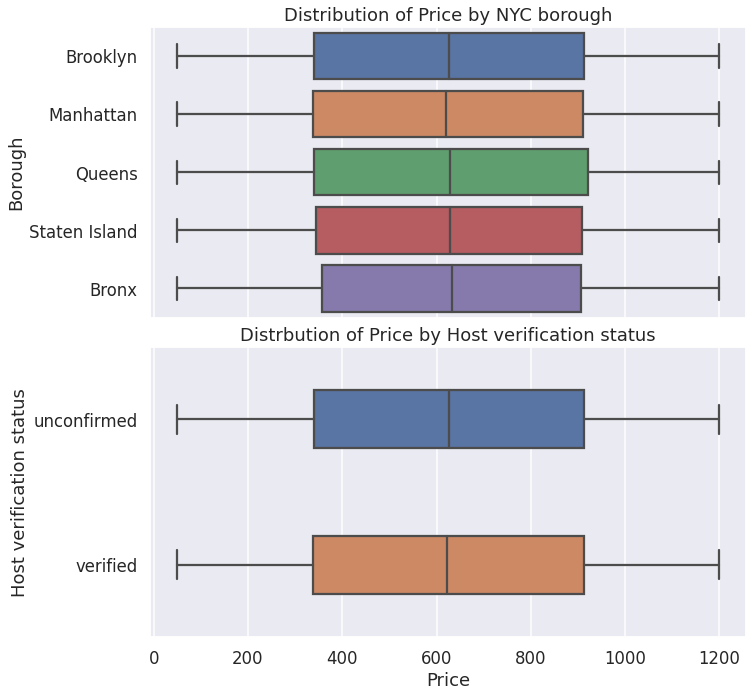

In [48]:
fig, ax= plt.subplots(2,1, figsize=(10, 10), squeeze=False, sharex=True)
plt.tight_layout(pad=2)
sns.boxplot(x='price', y='borough', data=df, ax=ax[0,0])\
                                                        .set(title='Distribution of Price by NYC borough',
                                                             xlabel=None,
                                                             ylabel='Borough')
sns.boxplot(x='price',y='host_identity_verified', data=df, width=0.4, ax=ax[1,0])\
                                                        .set(title='Distrbution of Price by Host verification status', 
                                                             xlabel='Price', 
                                                             ylabel='Host verification status')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

All the New York City boroughs have roughly the same distribution of price and roughly the same medians, which vary slightly. We can observe that the prices don't vary much across the boroughs.

### 3.3. Relationship between Price and Service Fee

[Text(0.5, 1.0, 'Relation between Minimum of nights and price'),
 Text(0.5, 0, 'Minimum nights'),
 Text(0, 0.5, 'price')]

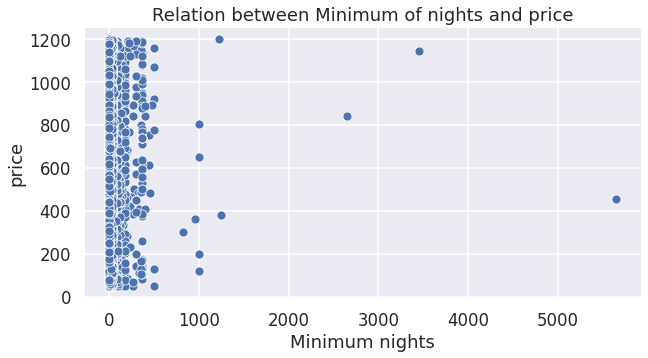

In [49]:
fig, ax= plt.subplots(figsize=(10, 5))
sns.scatterplot(data=df, x='min_nights', y='price')\
                         .set(title='Relation between Minimum of nights and price', 
                                                         xlabel='Minimum nights', 
                                                         ylabel='price')

[Text(0.5, 1.0, 'Relationship between Price and Service Fee'),
 Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Service fee')]

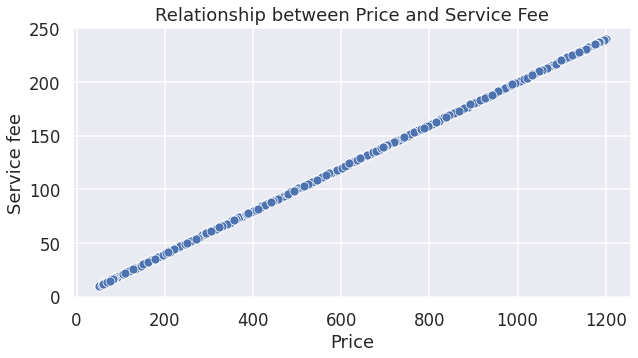

In [50]:
fig, ax= plt.subplots(figsize=(10, 5))
sns.scatterplot(x='price',y='serv_fee', data=df).set(title='Relationship between Price and Service Fee', 
                                                     xlabel='Price', 
                                                     ylabel='Service fee')

This plot suggests that rental price of Airbnb accommdation has a positive correlation with the service fee.

# **3. Summarisation**

**1. Which Airbnb has the most accommodation listing?**

'Home away from home' is the most common name in Airbnb, with 33 occurrences.

**2. Which borough locates the most accommodations?**

Manhattan has the most accommdations, with 43,558 rooms totalled.

**3. Which type of room is listed the most on Airbnb?**

'Entire home/apt is listed the most on Airbnb, with 53,701 roooms.

**4. How diffrerent are the accommodation prices by boroughs?**

The distribution of price across borough aren't vary much and rougly the same in five boroughs